# AI - Fall 00 - Computer Assignment 5(Phase 1)

<div style="font-size: 16px">
<b>Paria Khoshtab 810198387</b>
<hr>
</div>

<span style='color: #3973ac; font-size: 23px'><b>
Goal
</b></span>

The goal of this project is getting more familiar with feed forward neural network which consists of a number
of simple neuron-like processing units, organized in layers and every unit in a layer is connected with all the units
in the previous layer.

<span style='color: #3973ac; font-size: 23px'><b>
Brief Description
</b></span>

In this problem, we are going to implement a feed forward neural network from scratch by using Numpy library, in order
to categorize images. Each image is first flattened as a vector and then is given as the network input. Each element of this vector
(equivalent to one pixel of the image) is a feature. Based on these features and by making nonlinear combinations of
them, the network is supposed to adjust the weight of the connections between its layers in such a way that its output, with
the least error, correctly predicts the corresponding input image class.

<span style='color: #3973ac; font-size: 23px'><b>
Implementation
</b></span>

First we have to import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from matplotlib import image
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from PIL import Image
import cv2

In the code below, we read the dataset and store it in a dataframe.

In [2]:
df = pd.read_csv('./cifar_dataset/labels.csv')
df.head()

,id,label
0,8,horse
1,10,cat
2,12,horse
3,13,horse
4,18,cat


In [3]:
df['pixels'] = None
for index, row in df.iterrows():
    df.at[index, 'pixels'] = np.asarray(Image.open('./cifar_dataset/data/' + str(int(row['id'])) + '.png').convert('L'))
df.head()

,id,label,pixels
0,8,horse,"[[33, 34, 41, 75, 76, 43, 42, 56, 70, 77, 102,..."
1,10,cat,"[[124, 103, 93, 99, 101, 136, 171, 170, 143, 9..."
2,12,horse,"[[147, 171, 169, 173, 201, 212, 196, 135, 119,..."
3,13,horse,"[[203, 200, 200, 201, 201, 201, 202, 202, 202,..."
4,18,cat,"[[105, 135, 145, 130, 82, 55, 48, 52, 52, 53, ..."


In [4]:
train, test = train_test_split(df, test_size = 0.2)

In [5]:
train.head()

,id,label,pixels
5931,29366,horse,"[[152, 149, 145, 133, 136, 142, 148, 147, 142,..."
3925,19437,horse,"[[218, 216, 216, 216, 216, 216, 215, 215, 216,..."
6257,31151,cat,"[[59, 66, 69, 96, 138, 90, 74, 66, 66, 77, 68,..."
5089,25186,cat,"[[87, 105, 120, 111, 103, 132, 127, 122, 109, ..."
6741,33685,horse,"[[50, 71, 95, 182, 195, 201, 202, 201, 202, 20..."


In [6]:
test.head()

,id,label,pixels
500,2519,cat,"[[108, 110, 116, 118, 117, 118, 111, 144, 205,..."
9408,47063,cat,"[[40, 41, 38, 37, 38, 40, 42, 42, 50, 59, 56, ..."
8483,42454,horse,"[[85, 57, 46, 74, 96, 91, 85, 83, 91, 87, 84, ..."
5055,25029,cat,"[[138, 137, 137, 137, 138, 138, 138, 138, 138,..."
9423,47138,horse,"[[254, 251, 253, 251, 230, 226, 234, 205, 166,..."


<span style='color: #3973ac; font-size: 25px'><b>
Phase One: Data Visualization
</b> </span>

### Part 1: Random Sampling

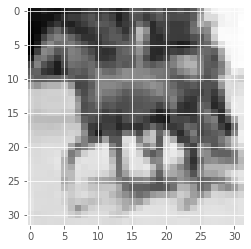

In [7]:
sample = train.sample(n = 1)
pyplot.imshow(sample.iloc[0].pixels, cmap='gray')
pyplot.show()

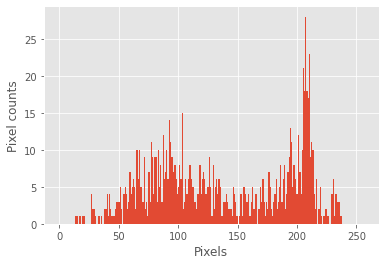

In [8]:
plt.hist(sample.iloc[0]['pixels'].ravel(), 256, [0,256])
plt.xlabel('Pixels')
plt.ylabel('Pixel counts')
plt.show()

As shown in the figure above, the value of each pixel is in the range of 0 to 255.

### Part 2: Random Sampling with the Given Class

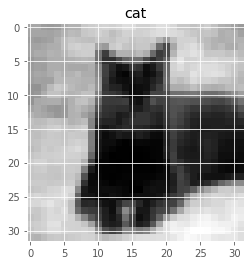

In [9]:
cat_sample = train[train['label'] == 'cat'].sample(n = 1)
pyplot.imshow(cat_sample.iloc[0].pixels, cmap='gray')
pyplot.title('cat')
pyplot.show()

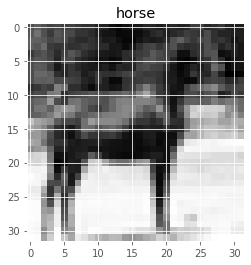

In [10]:
horse_sample = train[train['label'] == 'horse'].sample()
pyplot.imshow(horse_sample.iloc[0].pixels,  cmap='gray')
pyplot.title('horse')
pyplot.show()

### Part 3: Test and Train Plots

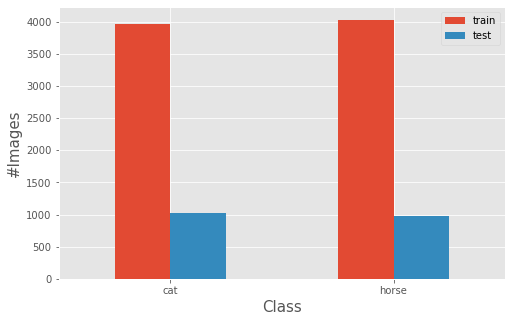

In [11]:
plotdata = pd.DataFrame({
    'train':[sum(train['label'] == 'cat'), sum(train['label'] == 'horse')],
    'test':[sum(test['label'] == 'cat'), sum(test['label'] == 'horse')]},
    index=['cat', 'horse'])
plotdata.plot(kind='bar',figsize=(8, 5), fontsize = 10)
plt.xticks(rotation='horizontal')
plt.xlabel('Class', fontsize = 15)
plt.ylabel('#Images', fontsize = 15);

### Part 4: Min-Max Normalization

<b>Consequences of non-normalization:</b><br>
- Forward propagation of neural networks involves the dot product of weights with input features. So, if the values are very high 
(specially for Image data), calculation of output takes a lot of computation time as well as memory. Same is the case
during back propagation. Consequently, Model converges slowly, if the Inputs are not normalized, so our 
training time will be more compared to training using normalized data.
- If a feature in the dataset is big in scale compared to others then this big scaled feature becomes dominating
and as a result of that, predictions of the neural network will not be accurate.

In [12]:
def generate_dataframes(dataframe):
    for index, row in dataframe.iterrows():
        dataframe.at[index, 'pixels'] = row['pixels'].flatten()
    col = np.arange(0, 1024, 1)
    data = pd.DataFrame(dataframe['pixels'].to_list(), columns=col)
    labels = pd.DataFrame(dataframe['label'])
    return data, labels

In [13]:
train_data, train_labels = generate_dataframes(train)
test_data, test_labels = generate_dataframes(test)

In [14]:
train_data = (train_data - train_data.min()) / (train_data.max() - train_data.min())
test_data = (test_data - test_data.min()) / (test_data.max() - test_data.min())

In [15]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.596078,0.584314,0.568627,0.521569,0.533333,0.556863,0.580392,0.576471,0.556863,0.529412,...,0.549020,0.411765,0.631373,0.686275,0.682353,0.682353,0.713725,0.627451,0.521569,0.509804
1,0.854902,0.847059,0.847059,0.847059,0.847059,0.847059,0.843137,0.843137,0.847059,0.843137,...,0.631373,0.635294,0.627451,0.603922,0.596078,0.607843,0.584314,0.580392,0.580392,0.572549
2,0.231373,0.258824,0.270588,0.376471,0.541176,0.352941,0.290196,0.258824,0.258824,0.301961,...,0.760784,0.756863,0.713725,0.709804,0.549020,0.450980,0.498039,0.564706,0.596078,0.427451
3,0.341176,0.411765,0.470588,0.435294,0.403922,0.517647,0.498039,0.478431,0.427451,0.623529,...,0.529412,0.549020,0.494118,0.376471,0.447059,0.388235,0.415686,0.439216,0.380392,0.345098
4,0.196078,0.278431,0.372549,0.713725,0.764706,0.788235,0.792157,0.788235,0.792157,0.792157,...,0.627451,0.607843,0.635294,0.588235,0.576471,0.580392,0.541176,0.564706,0.588235,0.572549


In [16]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.423529,0.431373,0.454902,0.462745,0.458824,0.462745,0.435294,0.564706,0.803922,0.694118,...,0.600000,0.498039,0.482353,0.482353,0.545098,0.576471,0.592157,0.572549,0.533333,0.576471
1,0.156863,0.160784,0.149020,0.145098,0.149020,0.156863,0.164706,0.164706,0.196078,0.231373,...,0.396078,0.427451,0.454902,0.482353,0.427451,0.419608,0.435294,0.470588,0.470588,0.494118
2,0.333333,0.223529,0.180392,0.290196,0.376471,0.356863,0.333333,0.325490,0.356863,0.341176,...,0.647059,0.639216,0.658824,0.650980,0.650980,0.686275,0.662745,0.670588,0.690196,0.701961
3,0.541176,0.537255,0.537255,0.537255,0.541176,0.541176,0.541176,0.541176,0.541176,0.541176,...,0.517647,0.556863,0.556863,0.549020,0.541176,0.549020,0.552941,0.556863,0.552941,0.549020
4,0.996078,0.984314,0.992157,0.984314,0.901961,0.886275,0.917647,0.803922,0.650980,0.505882,...,0.850980,0.843137,0.866667,0.850980,0.854902,0.874510,0.854902,0.874510,0.909804,0.913725


<span style='color: #3973ac; font-size: 25px'><b>
Phase 2: Neural Network Implementation
</b> </span>

# Dataloader

In [17]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        one_hot_encoded_data = pd.get_dummies(labels, columns = ['label'])
        return one_hot_encoded_data
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        index = np.random.permutation(self.__data.index)
        self.__data = self.__data.reindex(index)
        self.__onehot_labels = self.__onehot_labels.reindex(index)
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [18]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        relu_value = np.matrix(np.maximum(0, matrix))
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        relu_derivative = np.matrix(np.full(np.shape(matrix), 1.))
        relu_derivative[matrix < 0] = 0
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        leacky_relu_value = np.matrix(np.maximum(matrix * self.negative_slope, matrix))
        return leacky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        leacky_relu_derivative = np.matrix(np.full(np.shape(matrix), 1.))
        leacky_relu_derivative[matrix < 0] = self.negative_slope
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        sigmoid_value = np.matrix(1 / (1 + np.exp(-matrix)))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        sigmoid_value = self.__val(matrix)
        sigmoid_derivative = np.matrix(np.multiply(1 - sigmoid_value, sigmoid_value))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        matrix = np.asarray(matrix)
        exponential = np.exp(matrix - np.max(matrix, axis = 1, keepdims = True)) #subtracts each row with its max value
        exponential_sum = np.sum(exponential, axis = 1, keepdims = True) #returns sum of each row and keeps same dims
        softmax_value = np.matrix(exponential / exponential_sum)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        tanh_value = np.matrix((np.exp(matrix) - np.exp(-matrix))/(np.exp(matrix) + np.exp(-matrix)))
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        tanh_value = self.__val(matrix)
        tanh_derivative = np.matrix(1 - np.multiply(tanh_value, tanh_value))
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

# Loss Function

In [19]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val) == np.shape(expected_val)
        softmax = Softmax()
        cross_entropy_value = 0
        cross_entropy_value = np.sum(np.multiply(np.multiply(-1, expected_val), np.log2(softmax(true_val) + 1e-10)))
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val) == np.shape(expected_val)
        softmax = Softmax()
        cross_entropy_derivative = softmax(true_val) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [20]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight = 'uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight) == str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input) == 2
        assert np.size(self.__weight, 0) == np.size(layer_input, 1)
        self.__last_input = layer_input
        self.__last_activation_input = np.dot(layer_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        
        '''
        {z2 = w2a1, y = sigma(z2)},  {z1 = w1a0}                     
        layer[-1]: dL/dw2 = dL/dy * dy/dz2 * dz2/dw
        layer [-2]: dL/dw = dL/dy * dy/dz2 * dz2/da1 * da1/dz1 * dz1/w1
        -> backprop_tensor = dL/dy, dL/dy * dy/dz2 * dz2/da1, ... = backprop_tensor * last_activation_derivative * weight
        -> dL/dw = backprop_tensor * last_activation_serivative * last_input
        -> dL/db =backprop_tensor * last_activation_serivative * ones_vector  
        '''
        assert np.ndim(backprop_tensor) == 2
        assert np.size(backprop_tensor, 0) == np.size(self.__last_activation_derivative, 0)
        assert np.size(backprop_tensor, 1) == self.__n_neurons
        
        new_backprop_tensor = np.dot(np.multiply(backprop_tensor, self.__last_activation_derivative), self.__weight.T)
        self.__weight -= np.multiply(lr, np.dot(self.__last_input.T, np.multiply(backprop_tensor, self.__last_activation_derivative)))
        
        
        ones_vector = np.matrix(np.full((np.size(backprop_tensor, 0), 1), 1))
        self.__bias -= np.multiply(lr, np.dot(ones_vector.T, np.multiply(backprop_tensor, self.__last_activation_derivative)))
        
        return new_backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.matrix(np.random.uniform(low, high, size = (dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.matrix(np.random.normal(mean, np.sqrt(var), size = (dim1, dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [21]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
   
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = self.__loss(network_output, y_batch)/len(y_batch)
        self.__update_weights(network_output, y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        network_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = self.__loss(network_output, y_batch)/len(y_batch)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = np.zeros(np.shape(outputs))
        for i in range(len(outputs)):
            j = np.argmax(outputs[i])
            labels[i][j] = 1
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        accuracy = accuracy_score(expected_output, self.__get_labels(output))
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backprop_tensor = self.__loss.derivative(output, y_train)
        for i in range(len(self.__layers_list) - 1, -1, -1):
            backprop_tensor = self.__layers_list[i].update_weights(backprop_tensor, self.__lr)
        return

<span style='color: #3973ac; font-size: 25px'><b>
Phase 3: Data Classification
</b> </span>

### Part 1: Network Training

In [22]:
# Sample code for building and training a model

INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = Relu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.527875	Average Loss: 2.0179516787277603
	Test: Average Accuracy: 0.6026785714285714	Average Loss: 0.966559218413304
Epoch 2:
	Train: Average Accuracy: 0.60275	Average Loss: 0.9591392156952318
	Test: Average Accuracy: 0.6493055555555556	Average Loss: 0.9274899404710869
Epoch 3:
	Train: Average Accuracy: 0.630125	Average Loss: 0.9285202507142745
	Test: Average Accuracy: 0.6587301587301587	Average Loss: 0.895437317019936
Epoch 4:
	Train: Average Accuracy: 0.6495	Average Loss: 0.9007009130354977
	Test: Average Accuracy: 0.6825396825396826	Average Loss: 0.8652380400307391
Epoch 5:
	Train: Average Accuracy: 0.66775	Average Loss: 0.8718113380995274
	Test: Average Accuracy: 0.7078373015873016	Average Loss: 0.8290624736555716
Epoch 6:
	Train: Average Accuracy: 0.685375	Average Loss: 0.8444069233568855
	Test: Average Accuracy: 0.7123015873015873	Average Loss: 0.8087774716852159
Epoch 7:
	Train: Average Accuracy: 0.6995	Average Loss: 0.8245669806223673
	Test: 

### Part 2: Network Weighting 

<b> Zero initialization:</b>If all the weights are initialized to zeros, the derivatives will remain same for every weight.
    As a result, neurons will learn same features in each iterations. This problem is known as network failing to break
    symmetry. And not only zero, any constant initialization will produce a poor result.<br>
<b> Random Initialization: </b>
Random initialization is generally used to break the symmetry and this process gives much better accuracy than zero
initialization. It prevents neuron from learning the same features of its inputs. this technique gives much better accuracy
than zero initialization. <br>

### Part 3: Impact of Learning Rate

The trick for finding the best learning rate is to train a network starting from a low learning rate and increase
the learning rate exponentially. 

- Learning rate = 0.0001

Epoch 1:
	Train: Average Accuracy: 0.5015	Average Loss: 4.546519122504338
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 7.367326785880102
Epoch 2:
	Train: Average Accuracy: 0.495375	Average Loss: 3.4232402996186693
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.6103256475235024
Epoch 3:
	Train: Average Accuracy: 0.50125	Average Loss: 2.5880884891310947
	Test: Average Accuracy: 0.5148809523809523	Average Loss: 1.5258334462766412
Epoch 4:
	Train: Average Accuracy: 0.5115	Average Loss: 1.9476065357987087
	Test: Average Accuracy: 0.5148809523809523	Average Loss: 2.1878917982757247
Epoch 5:
	Train: Average Accuracy: 0.50525	Average Loss: 1.6878553650629302
	Test: Average Accuracy: 0.5148809523809523	Average Loss: 1.6507287887345234
Epoch 6:
	Train: Average Accuracy: 0.5015	Average Loss: 1.4365976754290315
	Test: Average Accuracy: 0.5148809523809523	Average Loss: 1.4942974929668564
Epoch 7:
	Train: Average Accuracy: 0.519625	Average Loss: 1.2390531890063143
	Test: Av

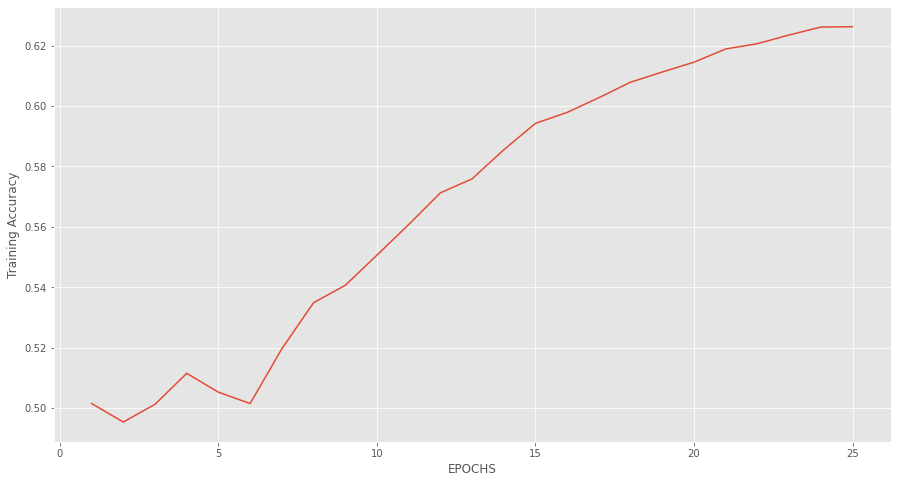

In [23]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.0001
EPOCHS = 25

TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = Relu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)
plt.figure(figsize=(15, 8)) 
plt.plot(np.arange(1, EPOCHS + 1), log['train_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("Training Accuracy")
plt.show()

- Learning rate = 0.001

Epoch 1:
	Train: Average Accuracy: 0.525375	Average Loss: 2.015205738440278
	Test: Average Accuracy: 0.5982142857142857	Average Loss: 0.9712827816641865
Epoch 2:
	Train: Average Accuracy: 0.59825	Average Loss: 0.9615518245935564
	Test: Average Accuracy: 0.6438492063492064	Average Loss: 0.9287237300082312
Epoch 3:
	Train: Average Accuracy: 0.625125	Average Loss: 0.9359249868397896
	Test: Average Accuracy: 0.6592261904761905	Average Loss: 0.9015402963024652
Epoch 4:
	Train: Average Accuracy: 0.64475	Average Loss: 0.9118557368657987
	Test: Average Accuracy: 0.6770833333333334	Average Loss: 0.8726309079188538
Epoch 5:
	Train: Average Accuracy: 0.659875	Average Loss: 0.8825193404147176
	Test: Average Accuracy: 0.6954365079365079	Average Loss: 0.8421060511178811
Epoch 6:
	Train: Average Accuracy: 0.6835	Average Loss: 0.8538463641644721
	Test: Average Accuracy: 0.7088293650793651	Average Loss: 0.8112559040168567
Epoch 7:
	Train: Average Accuracy: 0.698375	Average Loss: 0.8285539112275287
	Tes

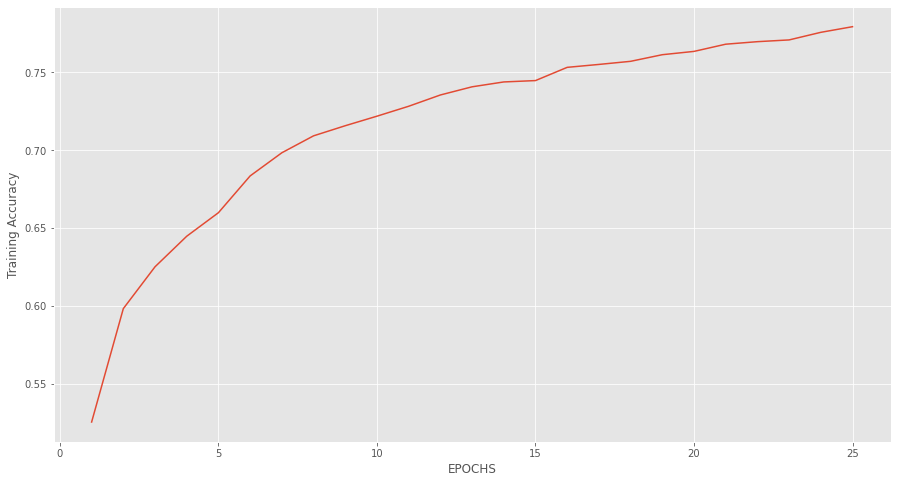

In [24]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25

TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = Relu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)
plt.figure(figsize=(15, 8)) 
plt.plot(np.arange(1, EPOCHS + 1), log['train_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("Training Accuracy")
plt.show()

- Learning rate = 0.01

Epoch 1:
	Train: Average Accuracy: 0.499	Average Loss: 1.0642433232005102
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0115100934645689
Epoch 2:
	Train: Average Accuracy: 0.50225	Average Loss: 1.0012084316288041
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0115100934645689
Epoch 3:
	Train: Average Accuracy: 0.50225	Average Loss: 1.0012084316288041
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0115100934645689
Epoch 4:
	Train: Average Accuracy: 0.50225	Average Loss: 1.0012084316288041
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0115100934645689
Epoch 5:
	Train: Average Accuracy: 0.50225	Average Loss: 1.0012084316288041
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0115100934645689
Epoch 6:
	Train: Average Accuracy: 0.50225	Average Loss: 1.0012084316288041
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0115100934645689
Epoch 7:
	Train: Average Accuracy: 0.50225	Average Loss: 1.0012084316288041
	Test: A

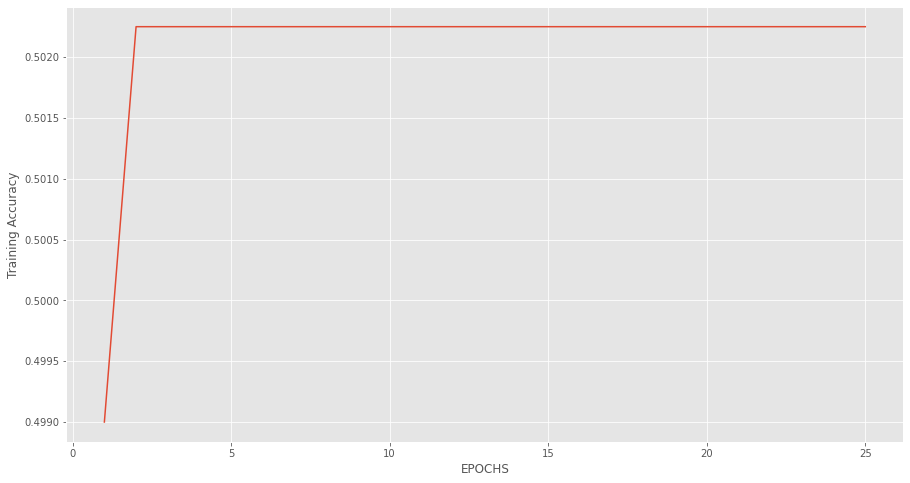

In [25]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.01
EPOCHS = 25

TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = Relu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=True)
plt.figure(figsize=(15, 8)) 
plt.plot(np.arange(1, EPOCHS + 1), log['train_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("Training Accuracy")
plt.show()

As can be seen above, the optimal learning rate is 0.001, because it trains the network with the highest accuracy.<br>
In addition to the difference in convergence time (small learning rate = slow convergence and vice versa), a learning rate
that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a
learning rate that is too small can cause the process to get stuck.

### Part 4: Impact of Activation Function

### Sigmoid

In [26]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = Sigmoid(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.506	Average Loss: 1.0056405094803171
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221447335542333
Epoch 2:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055811813078102
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221446285728686
Epoch 3:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055810593554888
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.022144523536144
Epoch 4:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055809373574962
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221444184419524
Epoch 5:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055808153116514
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.022144313288182
Epoch 6:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055806932157685
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221442080727154
Epoch 7:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055805710676562
	Test: Average Accurac

As can be seen above, we do not reach high accuracy with Sigmoid, and also Sigmoid may cause a neural network to get
stuck during training. because: <br>
As we know gradient of Sigmoid is S′(a) = S(a)(1 − S(a)) and is always smaller than one, when 'a' grows to infinite, 
S' tends to zero, because we have:<br> S′(a) = S(a)(1 − S(a)) = 1 * (1 − 1) = 0.
If we have many layers, we will multiply these gradients, and the product of many smaller than 1 values goes to zero very 
quickly. As the gradient value approaches zero, the network is not really learning because
the weights are no longer updated in the backprpagation and the accuracy of our neural network will not increase 
anymore.
This problem is referred to as the 'Vanishing Gradients' problem.

### Tanh

In [27]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = Tanh(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.505	Average Loss: 1.005839888833953
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221879632113797
Epoch 2:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055825308111181
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221879612104816
Epoch 3:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055825275926036
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221879592090868
Epoch 4:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055825243736738
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221879572071932
Epoch 5:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055825211543266
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221879552047999
Epoch 6:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055825179345594
	Test: Average Accuracy: 0.4851190476190476	Average Loss: 1.0221879532019056
Epoch 7:
	Train: Average Accuracy: 0.506	Average Loss: 1.0055825147143704
	Test: Average Accura

As can be seen above, we do not reach high accuracy with Tanh, and also Tanh may cause a neural network to get stuck during training. because:<br>
Tanh looks like a scaled sigmoid function. Data is centered around zero, so the derivatives will be higher.
Tanh quickly converges than sigmoid but still has the Vanishing Gradients problem.

### LeakyRelu

In [28]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 32, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 32, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = LeakyRelu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.526875	Average Loss: 1.9261166320634024
	Test: Average Accuracy: 0.5947420634920635	Average Loss: 0.9701183075019801
Epoch 2:
	Train: Average Accuracy: 0.59725	Average Loss: 0.9600148513134491
	Test: Average Accuracy: 0.6468253968253969	Average Loss: 0.9268893465636666
Epoch 3:
	Train: Average Accuracy: 0.6305	Average Loss: 0.9314450677809315
	Test: Average Accuracy: 0.6626984126984127	Average Loss: 0.8988742889741104
Epoch 4:
	Train: Average Accuracy: 0.644125	Average Loss: 0.9066514087554252
	Test: Average Accuracy: 0.6701388888888888	Average Loss: 0.87179676900478
Epoch 5:
	Train: Average Accuracy: 0.659875	Average Loss: 0.8793591173495415
	Test: Average Accuracy: 0.6979166666666666	Average Loss: 0.8374691360049474
Epoch 6:
	Train: Average Accuracy: 0.682625	Average Loss: 0.8497006425827938
	Test: Average Accuracy: 0.716765873015873	Average Loss: 0.8074643958521384
Epoch 7:
	Train: Average Accuracy: 0.699375	Average Loss: 0.8243539797643678
	Test

As can be seen above, Leaky Relu trains our neural network with high accuracy.<br>
One of the easiest ways to fix the problem of vanishing gradients is to replace the Sigmoid or Tanh activation function with
ReLU(Leaky ReLU) activation whose gradient is a constant.


### Disadvantages of Using Sigmoid and Tanh

A vanishing Gradient problem occurs with the sigmoid and tanh activation function because the derivatives of the 
sigmoid and tanh activation functions are between 0 to 0.25 and 0–1. Therefore, the updated weight values are small,
and the new weight values are very similar to the old weight values.

### Advantages of Using Leaky ReLU over normal ReLU

1. ReLU activation function gives the derivate as 1 when the value is positive. In case when the value is negative, 
the derivative becomes 0 during the backpropagation.
This means that when the value is negative, no learning happens as the new weight remains equal to the old weight since
the value of the derivative is 0. This is called the 'Dying ReLU' issue. Leaky Relu solves this issue.<br>
2. It speeds up training. There is evidence that having the “mean activation” be close to 0 makes training faster. Unlike ReLU,
leaky ReLU is more balanced, and may therefore learn faster.

### Part 5: Impact of Batch Size

- Batch size = 16

In [29]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 16, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 16, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = LeakyRelu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.511625	Average Loss: 2.2567927158685412
	Test: Average Accuracy: 0.608	Average Loss: 0.9624484563435289
Epoch 2:
	Train: Average Accuracy: 0.598125	Average Loss: 0.9619930297040855
	Test: Average Accuracy: 0.651	Average Loss: 0.9231372058834942
Epoch 3:
	Train: Average Accuracy: 0.6335	Average Loss: 0.9263985556867985
	Test: Average Accuracy: 0.6585	Average Loss: 0.8901766431738446
Epoch 4:
	Train: Average Accuracy: 0.652375	Average Loss: 0.8995922744849322
	Test: Average Accuracy: 0.669	Average Loss: 0.8598787081600074
Epoch 5:
	Train: Average Accuracy: 0.66775	Average Loss: 0.8754137079652583
	Test: Average Accuracy: 0.6845	Average Loss: 0.8328065160308101
Epoch 6:
	Train: Average Accuracy: 0.68475	Average Loss: 0.8535886159367064
	Test: Average Accuracy: 0.703	Average Loss: 0.8152880009960394
Epoch 7:
	Train: Average Accuracy: 0.696	Average Loss: 0.8333790701974497
	Test: Average Accuracy: 0.711	Average Loss: 0.7985068909080452
Epoch 8:
	Train: A

- Batch size = 256

In [30]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
TRAINLOADER = Dataloader(train_data, train_labels, 2, batch_size = 256, shuffle = False)
TESTLOADER = Dataloader(test_data, test_labels, 2, batch_size = 256, shuffle = False)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(32, activation = LeakyRelu(), initial_weight = 'uniform')
network.add_layer(2, activation = Identical(), initial_weight = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.517578125	Average Loss: 2.5035957884088216
	Test: Average Accuracy: 0.5339918870192308	Average Loss: 1.1124271833081867
Epoch 2:
	Train: Average Accuracy: 0.53759765625	Average Loss: 1.0773112485090746
	Test: Average Accuracy: 0.5341045673076923	Average Loss: 1.09564584362901
Epoch 3:
	Train: Average Accuracy: 0.5380859375	Average Loss: 1.0653957023761018
	Test: Average Accuracy: 0.5350811298076923	Average Loss: 1.0830075470860716
Epoch 4:
	Train: Average Accuracy: 0.538330078125	Average Loss: 1.05515125741319
	Test: Average Accuracy: 0.5375225360576923	Average Loss: 1.0721187463453643
Epoch 5:
	Train: Average Accuracy: 0.5404052734375	Average Loss: 1.0463775252766672
	Test: Average Accuracy: 0.5400766225961539	Average Loss: 1.062724402320653
Epoch 6:
	Train: Average Accuracy: 0.542236328125	Average Loss: 1.0388530032700696
	Test: Average Accuracy: 0.5414287860576923	Average Loss: 1.0546044555720706
Epoch 7:
	Train: Average Accuracy: 0.544189453125	

As can be seen, we achieve high accuracy with batch_size = 16, but low accuracy with batch_size = 256<br>
Bigger batch size still wouldn't give better solution in practice as compared to smaller batch size. This is 
because the surface of the neural networks objective is generally non-convex, which means that there might be
local optimums. Just having an accurate gradient estimate doesn't guarantee us reaching the global optimum.
It could lead us to a local optimum accurately! Keeping the batch size small makes the gradient estimate noisy which might
allow us to bypass a local optimum during convergence.

### Reason of Using Batch in Training

- It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory.
That's especially important if you are not able to fit the whole dataset in your machine's memory.
- Batch size controls the accuracy of the estimate of the error gradient when training neural networks.
- There is a tension between batch size and the speed and stability of the learning process.

### Impact of Using Extremely Small Batch Sizes

- Your gradient estimation is very noisy. This may cause your model to either diverge or to converge at a non optimal minima.
- Since you are using a small batch size, you are always suffering from sample bias. You are over-fitting 
the mini-batch distribution and not the actual distribution of the dataset. This means reduced accuracy.
- Smaller batch sizes make it easier to fit one batch worth of training data in memory (i.e. when using a GPU).

<span style='color: #3973ac; font-size: 23px'><b>
Conclusion
</b></span>

If we can find the optimal hyperparameters like activation functions, learning rate, and batch size
correctly, the neural network will classify the data with high accuracy and optimal time.